In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Introduction

This notebook contains the analysis of a dataset known as the Titanic Dataset. This dataset contains the information of people who survived and who did not, in the accident that took place on 14th April,1912. 

## Team Members(Team 11)

Rajtilak Pal,
Shreyan,
Tuhin and 
Ananya

### Lets import the dataset

In [2]:
titanic=pd.read_csv('titanic.csv')

### A small glimpse of the dataset

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lets see how much data we have with us

In [4]:
titanic.shape

(891, 12)

Looks like we have the information of 891 people and not the total 2200 people who were aboard Titanic that night.

### Lets take a look at the information of the columns

In [7]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


There are missing values in the columns 'Age','Cabin' and 'Embarked'. The missing values in 'Embarked' are really less and are less prone to yield wrong results when used in some analysis. On the other hand, if we continue to use Age without any modification to its null values, it might yield wrong results  

### Out of the 891 people info. that we have, lets see how many of them really survived

In [8]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We have the data of only 342 survivors out of 700 survivors and 549 non-surviviors out of 1500 non-survivors 

### 1. Lets see the survival count based on Gender

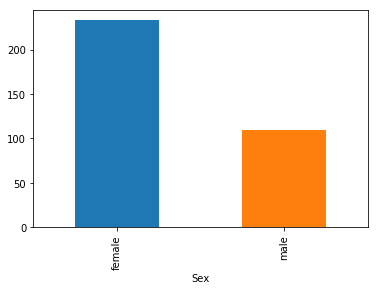

In [9]:
titanic[titanic['Survived']==1].groupby('Sex').count()['Survived'].plot(kind='bar')

Definitely more females survived than males. The female survivor count crosses 200 and male survivor count crosses just 100

### 2. Lets see the survival count of Males and Females and compare it to non-survivors

In [10]:
survived=titanic.groupby(['Survived','Sex']).count()['PassengerId'].reset_index()
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


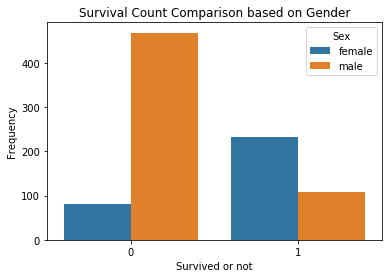

In [13]:
sns.barplot(x='Survived',y='PassengerId',hue='Sex',data=survived)
plt.title('Survival Count Comparison based on Gender')
plt.ylabel('Frequency')
plt.xlabel('Survived or not')
plt.show()

Clearly, we can see that the numbers of male non-survivor are very much greater than any other category.


### 3. But these are hard numbers. What if we could do an analysis based on percentage survived?

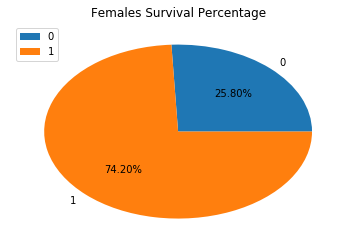

In [16]:
survived[survived['Sex']=='female'].plot(x='Survived',y='PassengerId',kind='pie',autopct='%.2f%%',labels=survived[survived['Sex']=='female']['Survived'])
plt.title('Females Survival Percentage')
plt.ylabel('')
plt.show()

We see that only 75% out of total females survived. 

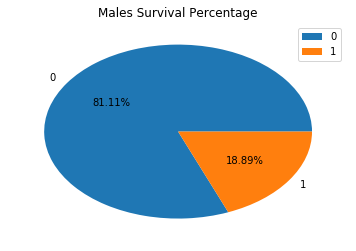

In [17]:
survived[survived['Sex']=='male'].plot(x='Survived',y='PassengerId',kind='pie',autopct='%.2f%%',labels=survived[survived['Sex']=='male']['Survived'])
plt.title('Males Survival Percentage')
plt.ylabel('')
plt.show()

We see that only 19% males survived out of total males.

### 4. Let us draw an analysis on the survival percentage of different Classes of people

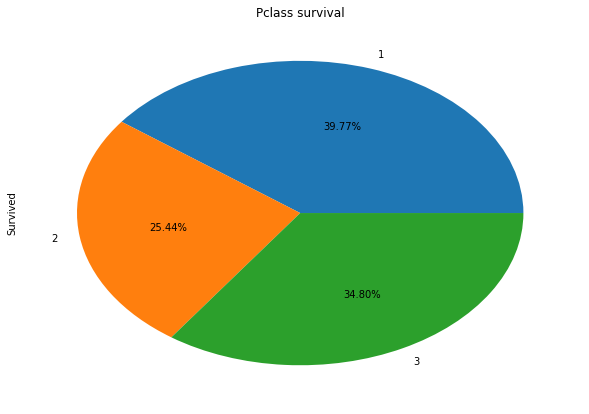

In [20]:
titanic[titanic['Survived']==1].groupby('Pclass').count()['Survived'].plot(kind='pie',autopct='%.2f%%',figsize=(10,7))
plt.title('Pclass survival')
plt.show()

There is not much difference in the percentages. The Class 1 people were at an advantage as they came to know of the accident on the first place and started evacuation first. It is surprising to see that the Class 3 people also shared an upper hand to the survival rate. Now, this might be the fault of the data we have(insufficient data). We really don't know.

### Small task : SibSp and Parch share the same category. Why don't we combine the two columns and make a new column 'Family'

In [21]:
titanic['Family']=titanic['SibSp']+titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### 5. Lets take a look how many people survived according to Age

#### Since there is a considerable amount of missing values we cannot directly drop those rows. Even, we cannot replace the missing values by  mean. That would be incorrect

#### The approach we used is to get the 'means' of categories of people categorized by Mr., Mrs., Miss. and Master

In [110]:
avgAgeMr=titanic[titanic['Name'].str.contains('Mr. ')]['Age'].mean()
avgAgeMrs=titanic[titanic['Name'].str.contains('Mrs. ')]['Age'].mean()
avgAgeMiss=titanic[titanic['Name'].str.contains('Miss. ')]['Age'].mean()
avgAgeMas=titanic[titanic['Name'].str.contains('Master. ')]['Age'].mean()

#### We get the average of each category,i.e., Mr, Mrs, Miss and Master

In [81]:
print('Average age of Adult Males: ',avgAgeMr)
print('Average age of Married Females: ',avgAgeMrs)
print('Average age of Unmarried Females: ',avgAgeMiss)
print('Average age of Children: ',avgAgeMas)

Average age of Adult Males:  32.332089552238806
Average age of Married Females:  35.898148148148145
Average age of Unmarried Females:  21.773972602739725
Average age of Children:  4.574166666666667


#### Then we filter the rows of each category

In [82]:
x1=titanic[titanic['Name'].str.contains('Mr. ')]
x2=titanic[titanic['Name'].str.contains('Mrs. ')]
x3=titanic[titanic['Name'].str.contains('Miss. ')]
x4=titanic[titanic['Name'].str.contains('Master. ')]

#### We fill the missing values of each category with their corresponding averages

In [83]:
x1.fillna(value={'Age': avgAgeMr},inplace=True)
x2.fillna(value={'Age': avgAgeMrs},inplace=True)
x3.fillna(value={'Age': avgAgeMiss},inplace=True)
x4.fillna(value={'Age': avgAgeMas},inplace=True)

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [88]:
x1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,32.33209,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00000,0,0,A/5. 2151,8.0500,NaN,S,0


In [89]:
x2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,0


In [90]:
x3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,0


In [91]:
x4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,5
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,5
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,7
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,5


### We merge the dataframes to reproduce the original Titanic dataframe  but with no null Ages

In [101]:
notnullAgeTitanic=x1.append([x2,x3,x4],ignore_index=True).sort_values('PassengerId')

In [104]:
notnullAgeTitanic.reset_index(inplace=True)

In [105]:
notnullAgeTitanic

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,521,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,646,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,522,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,1,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,2,6,0,3,"Moran, Mr. James",male,32.332090,0,0,330877,8.4583,NaN,Q,0
6,3,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,828,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,523,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,524,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


In [111]:
notnullAgeTitanic.shape

(868, 14)

#### It is interesting to note that the merged dataframe does not have 891 rows. This might be because we used only 4 deisgnations(i.e., Mr, Mrs, Miss and Master). There might be another designation or no designation that we did not account for.

In [123]:
titanic[~titanic['PassengerId'].isin(notnullAgeTitanic['PassengerId'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,0
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,2
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,1
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,0
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,0


These are the people whose data did not get added into the merged dataframe

### Atlast we plot the survival count of ranges of Ages

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


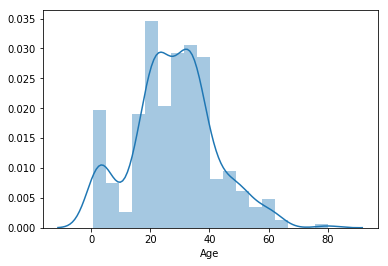

In [109]:
sns.distplot(notnullAgeTitanic[notnullAgeTitanic['Survived']==1]['Age'])
plt.show()

People of age range 20 to 40 survived the most, followed by children, followed by old aged. 

But from this graph we are unable to understand one thing: whether the probability of children getting saved is greater than the probability of adults getting saved or not.  

x1, x2, x3 and x4 still holds the value of People of Age Category Adult Males, Married Females, Unmarried Females and Children.

# The ultimate Analysis

## Percentage of Adult Males Survived

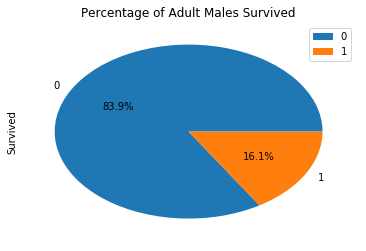

In [135]:
x1['Survived'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Percentage of Adult Males Survived')
plt.legend()
plt.show()

## Percentage of Married Females Survived

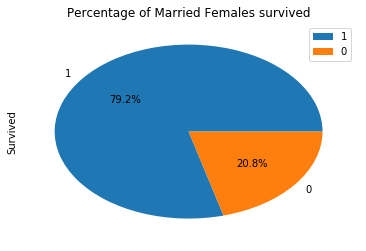

In [137]:
x2['Survived'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Percentage of Married Females survived')
plt.legend()
plt.show()

## Percentage of Unmarried Females survived

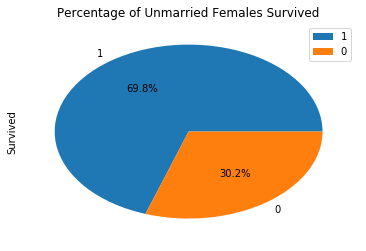

In [138]:
x3['Survived'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Percentage of Unmarried Females Survived')
plt.legend()
plt.show()

## Percentage of Children survived

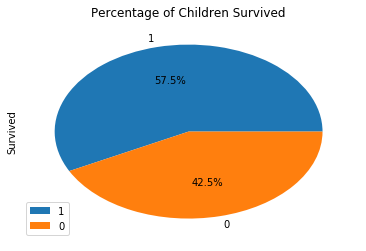

In [142]:
x4['Survived'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Percentage of Children Survived')
plt.legend()
plt.show()

# Conclusion

The first inference is that Women and Children got preference in survival( which matches with what was shown in the film).
Next, 75% Females survived and 19% males survived only( atleast according to the data).
Class did not really matter with the survival process. 
Only 16% of Adult males, 79.2% Married women, 69.8% Unmarried women and 57.5% Children survived.